<a href="https://colab.research.google.com/github/DenisDrobyshev/university/blob/master/14_05_2025_%D0%94%D0%B8%D0%B0%D0%B3%D0%BD%D0%BE%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%964_%D0%91%D0%B8%D0%B1%D0%BB%D0%B8%D0%BE%D1%82%D0%B5%D0%BA%D0%B0_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Диагностическая работа №4. Библиотека Pandas**

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline

**Считаем данные из файла в память в виде объекта Pandas.DataFrame**

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## **Задание №1**


Рассчитайте процент выживших пассажиров в зависимости от класса (Pclass). Представьте результат в виде таблицы с колонками "Pclass" и "Survival Rate (%)". Какой класс имел самый высокий шанс выживания?


In [3]:
survival_rates = df.groupby('Pclass')['Survived'].mean() * 100
survival_rates = survival_rates.reset_index()
survival_rates.columns = ['Pclass', 'Survival Rate (%)']
print(survival_rates)

highest_survival_class = survival_rates.loc[survival_rates['Survival Rate (%)'].idxmax()]
print("\nКласс с самым высоким шансом выживания:")
highest_survival_class


   Pclass  Survival Rate (%)
0       1          62.962963
1       2          47.282609
2       3          24.236253

Класс с самым высоким шансом выживания:


,0
Pclass,1.000000
Survival Rate (%),62.962963


## **Задание №2**


Создайте новую колонку "Fare_Category", разделив пассажиров на категории по стоимости билета: "Budget" (до 20), "Economy" (20-50), "Premium" (50-100) и "Luxury" (более 100). Посчитайте количество пассажиров и процент выживших в каждой категории.


In [9]:
Fare_Category = pd.cut(df['Fare'], bins=[0, 20, 50, 100, np.inf], labels=['Budget', 'Economy', 'Premium', 'Luxury'])
df['Fare_Category'] = Fare_Category

survival_rates = df.groupby('Fare_Category')['Survived'].agg(['count', 'mean'])
survival_rates.columns = ['Итоговое количество пассажиров', 'Процент выживаемости']
survival_rates = survival_rates.reset_index()
survival_rates


<ipython-input-9-689b147989cd>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rates = df.groupby('Fare_Category')['Survived'].agg(['count', 'mean'])


,Fare_Category,Итоговое количество пассажиров,Процент выживаемости
0,Budget,500,0.284000
1,Economy,216,0.416667
2,Premium,107,0.654206
3,Luxury,53,0.735849


## **Задание №3**


Постройте столбчатую диаграмму (bar chart), показывающую распределение пассажиров по портам посадки (Embarked). Добавьте на график процент выживших для каждого порта, используя второстепенную ось.

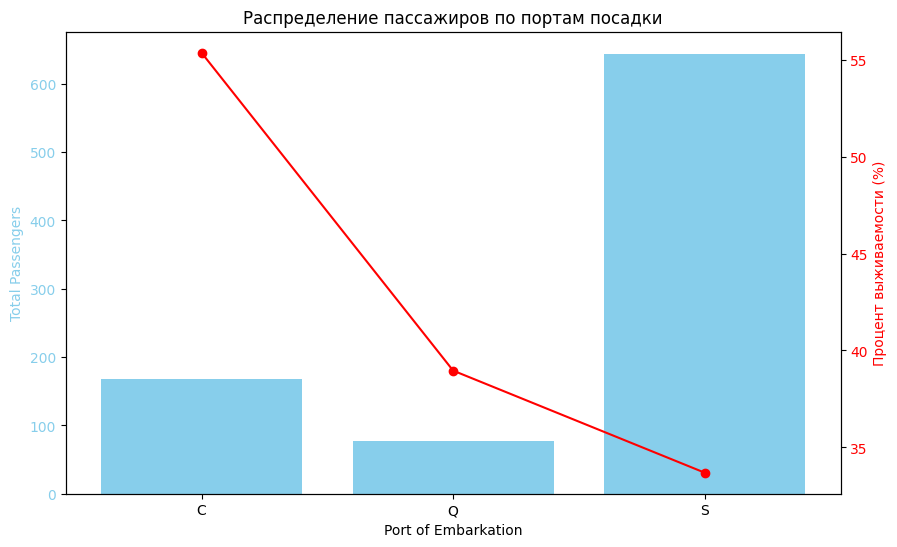

In [7]:
import matplotlib.pyplot as plt

embarked_stats = df.groupby('Embarked')['Survived'].agg(['count', 'mean'])
embarked_stats.columns = ['Total Passengers', 'Survival Rate']
embarked_stats = embarked_stats.reset_index()
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(embarked_stats['Embarked'], embarked_stats['Total Passengers'], color='skyblue')
ax1.set_xlabel("Port of Embarkation")
ax1.set_ylabel("Total Passengers", color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

ax2 = ax1.twinx()
ax2.plot(embarked_stats['Embarked'], embarked_stats['Survival Rate'] * 100, color='red', marker='o')
ax2.set_ylabel("Процент выживаемости (%)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title("Распределение пассажиров по портам посадки")
plt.show()


## **Задание №4**


Проанализируйте связь между размером семьи (создайте колонку "Family_Size" = SibSp + Parch + 1) и вероятностью выживания. Сформулируйте вывод о том, как размер семьи мог влиять на шанс спасения.

In [10]:
Family_Size = df['SibSp'] + df['Parch'] + 1
df['Family_Size'] = Family_Size
survival_rates = df.groupby('Family_Size')['Survived'].mean() * 100
survival_rates

,Survived
Family_Size,
1,30.353818
2,55.279503
3,57.843137
4,72.413793
5,20.000000
6,13.636364
7,33.333333
8,0.000000
11,0.000000


## **Задание №5**


Заполните пропуски в колонке "Cabin" значением "Unknown". Затем создайте новую колонку "Deck", которая будет содержать только первую букву каюты (обозначение палубы). Проанализируйте выживаемость по разным палубам и постройте соответствующую визуализацию.

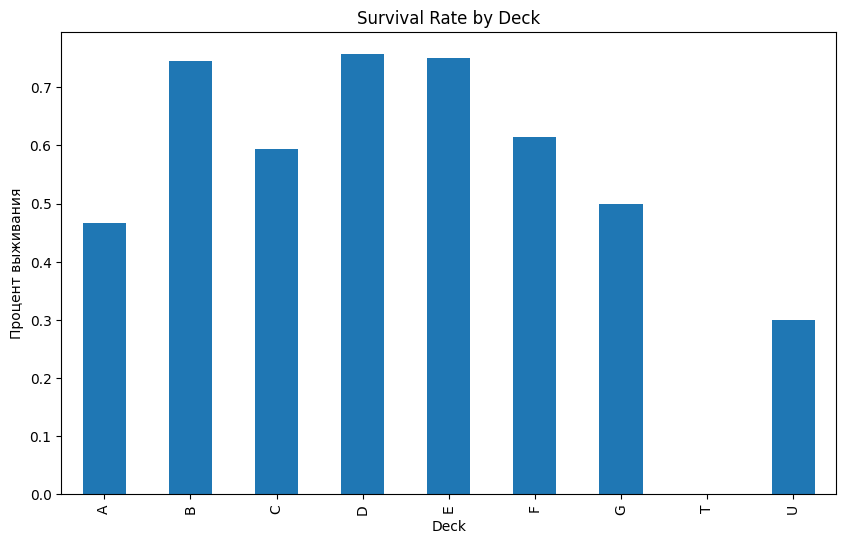

In [12]:
import matplotlib.pyplot as plt
df['Cabin'].fillna('Unknown', inplace=True)
df['Deck'] = df['Cabin'].str[0]

deck_survival = df.groupby('Deck')['Survived'].mean()
plt.figure(figsize=(10, 6))
deck_survival.plot(kind='bar')
plt.title('Survival Rate by Deck')
plt.xlabel('Deck')
plt.ylabel('Процент выживания')
plt.show()
